In [1]:
import pandas as pd

df = pd.read_csv("../Data/african_crises.csv")
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


case - country code<br>
cc3 - three letter country code<br>
country - country<br>
year - observation year<br>
systemic_crisis - 0: no systematic crisis, 1: systematic crisis<br>
exch_usd - the exchange rate of the country vis-a-vis the USD<br>
domestic_debt_in_default - 0: no sovereign domestic debt fault, 1: sovereign domestic debt fault<br>
sovereign_external_debt_default - no sovereign external domestic debt fault, 1: sovereign external domestic debt fault<br>
gdp_weighted_default - the total debt in default vis-a-vis the GDP<br>
inflation_annual_cpi - the annual CPI Inflation rate<br>
independence - 0: no independence, 1: independence<br>
currency_crises - 0: no currency crisis, 1: currency crisis<br>
inflation_crises - 0: no inflation crisis, 1: inflation crisis<br>
banking_crisis: 0: no banking crisis, 1: banking crisis

In [3]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [4]:
df['country'].unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [5]:
df['cc3'].unique()

array(['DZA', 'AGO', 'CAF', 'CIV', 'EGY', 'KEN', 'MUS', 'MAR', 'NGA',
       'ZAF', 'TUN', 'ZMB', 'ZWE'], dtype=object)

In [6]:
df.drop(columns='cc3', inplace=True)
df.head(2)

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis


In [7]:
df['banking_crisis'] = df['banking_crisis'].apply(lambda x: 0 if x == "no_crisis" else 1)
df.head()

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


In [8]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

country_list = df['country'].unique()

plt.figure(figsize=(16, 16))

for i, country in enumerate(country_list):
    plt.subplot(5, 3, i + 1)
    plt.title(country)
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    sns.lineplot(df[df['country'] == country]['year'], df[df['country'] == country]['exch_usd'], color=col)
    plt.scatter(df[df['country'] == country]['year'], df[df['country'] == country]['exch_usd'], color=col, s=28)
    
    plt.plot([np.min(df[np.logical_and(df['country'] == country, df['independence'] == 1)]['year']),
              np.min(df[np.logical_and(df['country'] == country, df['independence'] == 1)]['year'])],
             [0, np.max(df[df['country'] == country]['exch_usd'])], color='black', linestyle='dotted', alpha=0.8)
    plt.text(np.min(df[np.logical_and(df['country'] == country, df['independence'] == 1)]['year']),
             np.max(df[df['country'] == country]['exch_usd']) / 2, 'Independence', rotation=-90)

plt.tight_layout()
plt.show()

<Figure size 1600x1600 with 13 Axes>

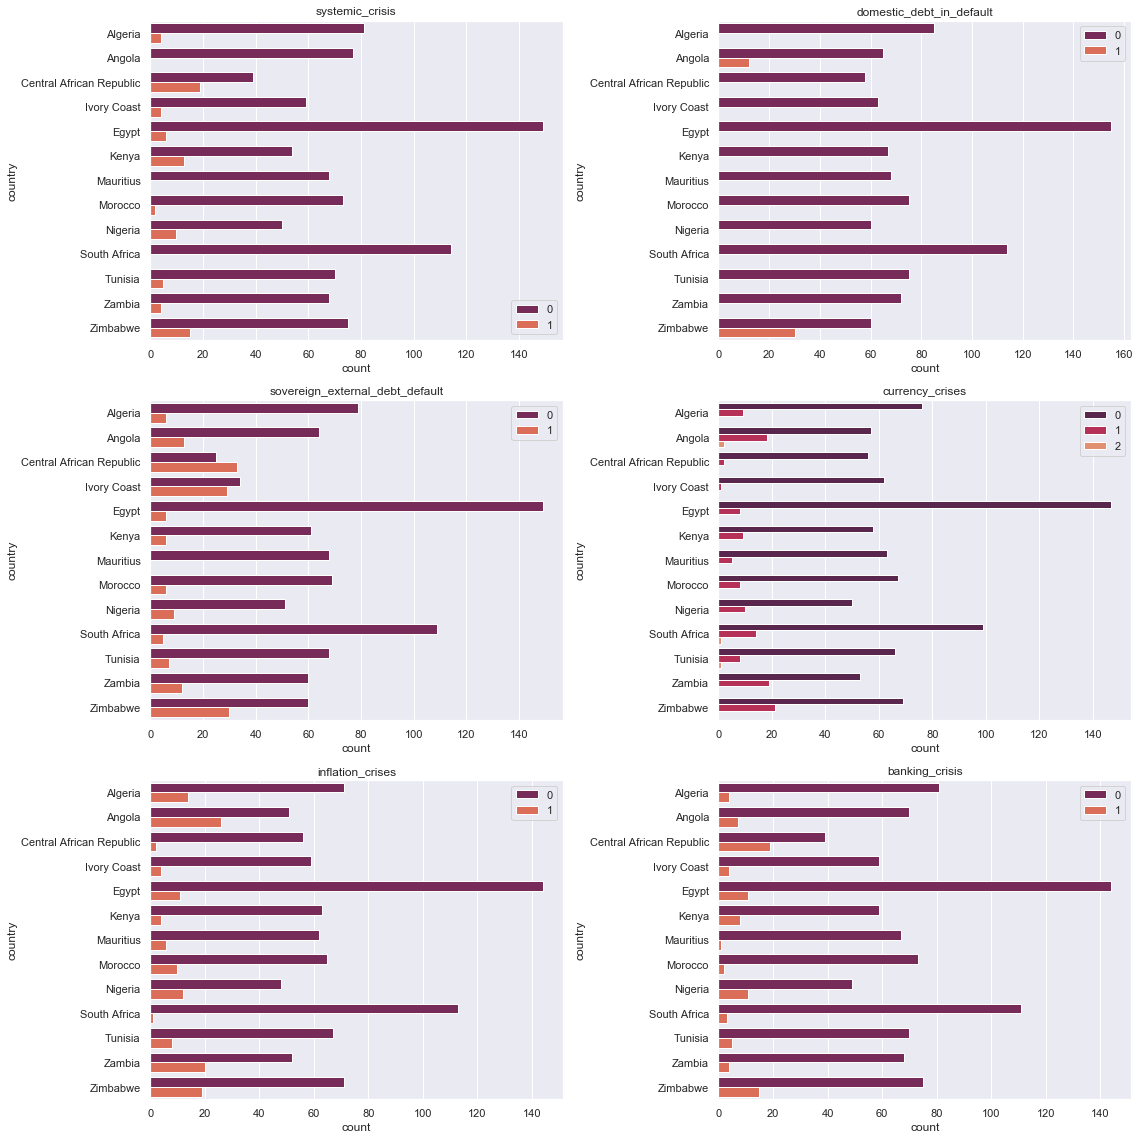

In [9]:
sns.set(style='darkgrid')
cols = ['systemic_crisis', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'currency_crises',
        'inflation_crises','banking_crisis']

plt.figure(figsize=(16,16))

for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(y=df['country'], hue=df[col], palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

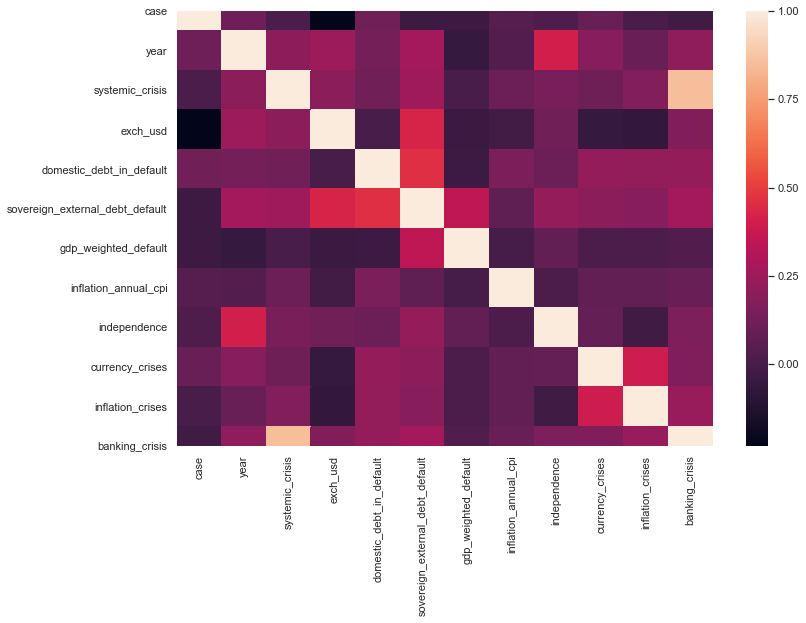

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr())
plt.show()

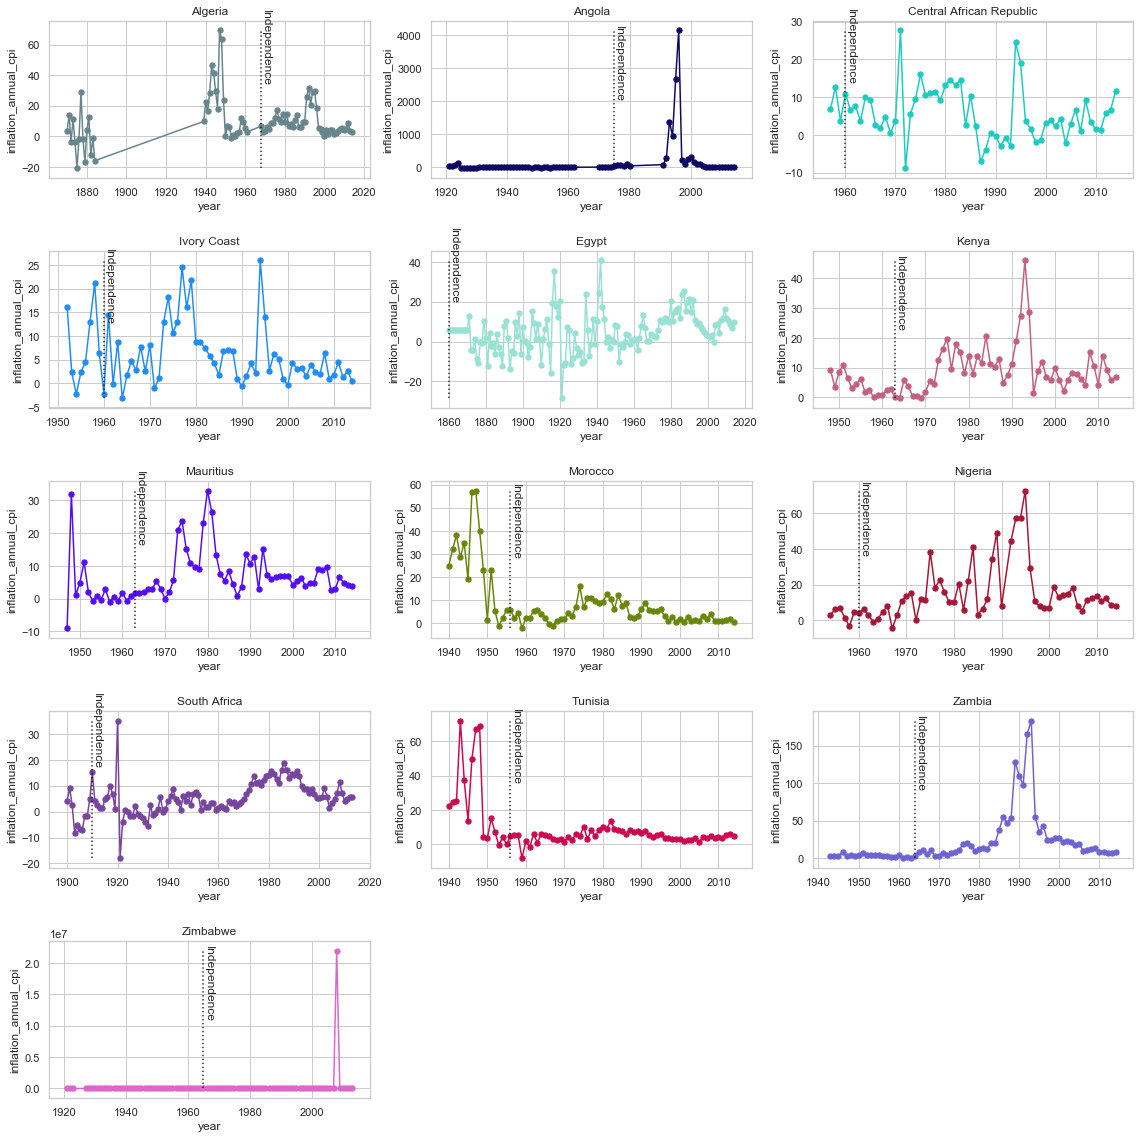

In [11]:
sns.set(style='whitegrid')
plt.figure(figsize=(16, 16))

for i, country in enumerate(country_list):
    plt.subplot(5, 3, i + 1)
    plt.title(country)
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    
    sns.lineplot(df[df['country'] == country]['year'], df[df['country'] == country]['inflation_annual_cpi'], color=col)
    plt.scatter(df[df['country'] == country]['year'], df[df['country'] == country]['inflation_annual_cpi'], color=col, s=28)
    
    plt.plot([np.min(df[np.logical_and(df['country'] == country, df['independence'] == 1)]['year']),
              np.min(df[np.logical_and(df['country'] == country, df['independence'] == 1)]['year'])],
             [np.min(df[df['country'] == country]['inflation_annual_cpi']), 
              np.max(df[df['country'] == country]['inflation_annual_cpi'])], color='black', 
             linestyle='dotted', alpha=0.8)
    plt.text(np.min(df[np.logical_and(df['country'] == country, df['independence'] == 1)]['year']),
             np.max(df[df['country'] == country]['inflation_annual_cpi']) / 2, 'Independence', rotation=-90)

plt.tight_layout()
plt.show()